# Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Data Collection

In [4]:
gold_dataset = pd.read_csv("Gold vs USDINR.csv") 

In [5]:
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      53 non-null     object 
 1   USD_INR   53 non-null     float64
 2   Goldrate  53 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.4+ KB


In [6]:
gold_dataset.describe()

,USD_INR
count,53.000000
mean,83.717398
std,0.637302
min,82.752296
25%,83.301804
50%,83.544998
75%,83.988998
max,85.786598


In [7]:
gold_dataset.isna().sum()

Date        0
USD_INR     0
Goldrate    0
dtype: int64

## Data Analysis

In [8]:
gold_dataset.head()

,Date,USD_INR,Goldrate
0,2024-01-01,83.240601,"₹5,066.31"
1,2024-01-08,83.076103,"₹4,966.31"
2,2024-01-15,83.160599,"₹5,015.33"
3,2024-01-22,83.146103,"₹4,950.84"
4,2024-01-29,82.927597,"₹4,976.77"


In [9]:
gold_dataset['Goldrate'] = gold_dataset['Goldrate'].replace('₹', '', regex=True).replace(',','', regex=True).astype(float)

In [10]:
gold_dataset.head()

,Date,USD_INR,Goldrate
0,2024-01-01,83.240601,5066.31
1,2024-01-08,83.076103,4966.31
2,2024-01-15,83.160599,5015.33
3,2024-01-22,83.146103,4950.84
4,2024-01-29,82.927597,4976.77


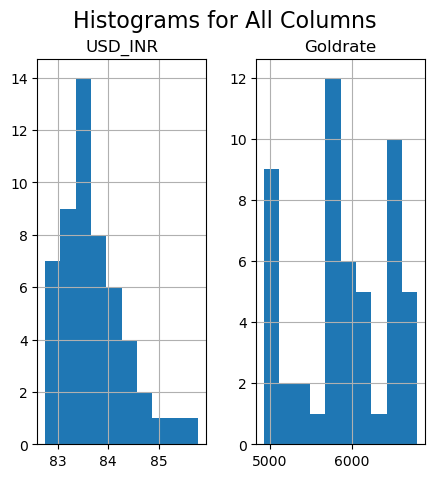

In [11]:
gold_dataset.hist(figsize=(5, 5), bins=10)
plt.suptitle("Histograms for All Columns", fontsize=16)
plt.show()

## EDA

- Handle missing values - No        (Because in this dataset there is no missing value)
- Handle Imbalanced dataset - No    (Because in this dataset there is no imbalanced data)
- Handle outliers - Seen            (as the boxplot shoe some outliers)
- Encode categorical features - No  (as our dataset is no categorical)
- Normalization vs Standardisation - standardize

<Axes: ylabel='USD_INR'>

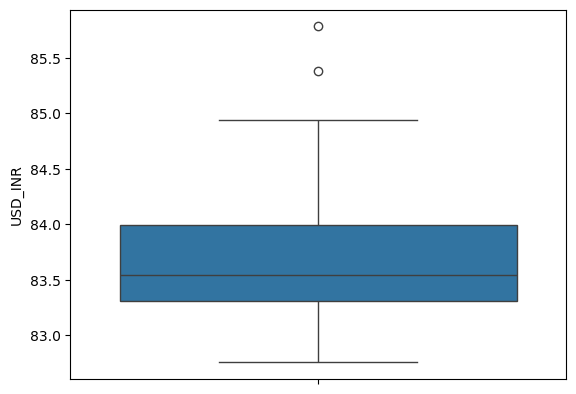

In [12]:
sns.boxplot(gold_dataset['USD_INR'])

In [13]:
gold_dataset['USD_INR'].min()

82.75229645

In [14]:
gold_dataset['USD_INR'].max()

85.78659821

<Axes: xlabel='USD_INR', ylabel='Goldrate'>

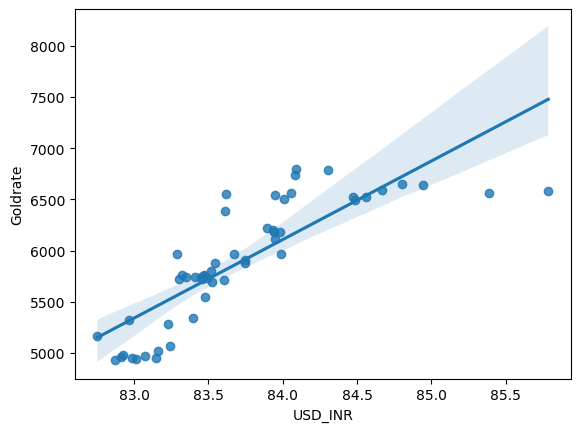

In [15]:
sns.regplot(x='USD_INR', y='Goldrate', data=gold_dataset)

## Model Training

In [16]:
X = gold_dataset[['USD_INR']]
y = gold_dataset[['Goldrate']]

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [18]:
X_train.shape, X_test.shape

((47, 1), (6, 1))

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [22]:
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [23]:
regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [24]:
regressor.coef_

array([[469.20755762]])

In [25]:
regressor.intercept_

array([5878.57340426])

In [26]:
# y = mx+b
m = regressor.coef_[0][0]
b = regressor.intercept_[0]

In [27]:
m,b

(469.2075576153299, 5878.573404255313)

In [28]:
x_train_predict = regressor.predict(X_train_scaled)

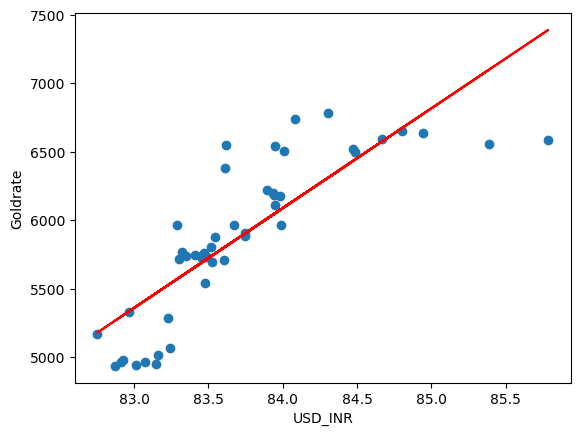

In [29]:
plt.scatter(X_train,y_train)
plt.plot(X_train, x_train_predict, color='r')
plt.xlabel("USD_INR")
plt.ylabel("Goldrate")

plt.show()

In [30]:
X_test_predicted = regressor.predict(X_test)

c:\Users\Ajith G\anaconda3\envs\genderclass\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [31]:
X_test_predicted

array([[45043.37534685],
       [45317.25277887],
       [45553.35648286],
       [45007.19819606],
       [45334.9404211 ],
       [44815.90247189]])

In [32]:
y_test

,Goldrate
19,5754.39
41,6563.33
47,6524.06
12,5341.21
43,6795.35
5,4953.90


In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
mean_squared_error(y_test, X_test_predicted)

1536074462.457844

## Hyperparameter optimization

In [35]:
from sklearn.model_selection import RandomizedSearchCV
param_space = {'copy_X': [True,False], 
               'fit_intercept': [True,False], 
               'n_jobs': [1,5,10,15,None], 
               'positive': [True,False]}

In [36]:
search = RandomizedSearchCV(regressor, param_space, n_iter=50, cv=5)

In [37]:
search.fit(X_train_scaled, y_train)

c:\Users\Ajith G\anaconda3\envs\genderclass\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_iter=50,
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [1, 5, 10, 15, None],
                                        'positive': [True, False]})

In [38]:
search.best_params_

{'positive': True, 'n_jobs': 1, 'fit_intercept': True, 'copy_X': True}

In [39]:
tuned_model = LinearRegression(positive= True, n_jobs= 1, fit_intercept= True, copy_X= True)

In [40]:
tuned_model.fit(X_train_scaled, y_train)

LinearRegression(n_jobs=1, positive=True)

In [41]:
tuned_model.coef_

array([[469.20755762]])

In [42]:
tuned_model.intercept_

array([5878.57340426])

In [43]:
input = scaler.transform(np.array(100).reshape(1,-1))
prediction = regressor.predict(input)
prediction

c:\Users\Ajith G\anaconda3\envs\genderclass\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[17756.0811394]])

In [44]:
input = scaler.transform(np.array(100).reshape(1,-1))
prediction = tuned_model.predict(input)
prediction

c:\Users\Ajith G\anaconda3\envs\genderclass\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[17756.0811394]])

## MLOPS

- Save the model
- Build Interface
- Connect model and Interface

In [45]:
import pickle
import os
os.makedirs('../model/Linear', exist_ok=True)

In [46]:
with open('../model/Linear/model.pkl', 'wb') as f:
    pickle.dump(tuned_model, f)
print("Model saved successfully")

Model saved successfully


In [47]:
with open('../model/Linear/scaled_data.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("Model saved successfully")

Model saved successfully


### Testing the trained model

In [49]:
scaler = pickle.load(open('../model/Linear/scaled_data.pkl','rb'))
model = pickle.load(open('../model/Linear/model.pkl','rb'))

def calculate_goldrate(usd_inr):
    scaled_input = scaler.transform(np.array(usd_inr).reshape(1,-1))
    return round(model.predict(scaled_input)[0][0],2)

In [50]:
calculate_goldrate(88.5)

c:\Users\Ajith G\anaconda3\envs\genderclass\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


9369.99